In [2]:
from sklearn.decomposition import PCA
import numpy as np

In [3]:
PCA

sklearn.decomposition._pca.PCA

In [4]:
PCA?


Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', def

In [6]:
pca = PCA(n_components=1)

In [8]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0, 100, size=100)
X[:, 1] = 0.75*X[:, 0] + 3.0 + np.random.normal(0, 10, size=100)
pca.fit(X)

PCA(n_components=1)

In [9]:
pca.components_ 

array([[-0.76252205, -0.64696223]])

In [16]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [18]:
X.shape

(1797, 64)

In [13]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [15]:
digits.data.shape

(1797, 64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [20]:
X_train.shape

(1347, 64)

In [21]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 485 ms


KNeighborsClassifier()

In [22]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [23]:
pca = PCA(n_components=2)

In [24]:
pca.fit(X_train)

PCA(n_components=2)

In [25]:
pca.transform(X)


array([[  6.57168822, -19.26717686],
       [ -1.14145834,  21.62050405],
       [  2.83602454,  11.40731716],
       ...,
       [  7.32001929,  10.21811606],
       [ -0.10375752, -13.35772399],
       [  3.40461449,  -6.87531931]])

In [27]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [29]:
%%time
knn_clf_pca = KNeighborsClassifier()
knn_clf_pca.fit(X_train_reduction, y_train)
knn_clf_pca.score(X_test_reduction, y_test)

CPU times: total: 15.6 ms
Wall time: 45.8 ms


0.6066666666666667

In [30]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [31]:
pca = PCA(X.shape[1])

In [32]:
pca.fit(X_train)

PCA(n_components=64)

In [33]:
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

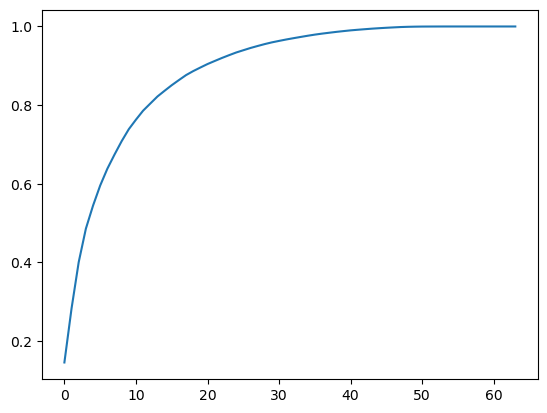

In [37]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(X_train.shape[1])], [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [38]:
pca = PCA(0.95)# 不知道要取多少个主成分,但是期望能得到95%的方差,也即能保留样本95%的信息


In [39]:
pca.fit(X_train)

PCA(n_components=0.95)

In [40]:
pca.n_components_

28

In [42]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [43]:
%%time
knn_clf_pca = KNeighborsClassifier()
knn_clf_pca.fit(X_train_reduction, y_train)
knn_clf_pca.score(X_test_reduction, y_test)

CPU times: total: 625 ms
Wall time: 150 ms


0.98

In [44]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_reduction = pca.transform(X_train)

In [45]:
X_reduction.shape

(1347, 2)

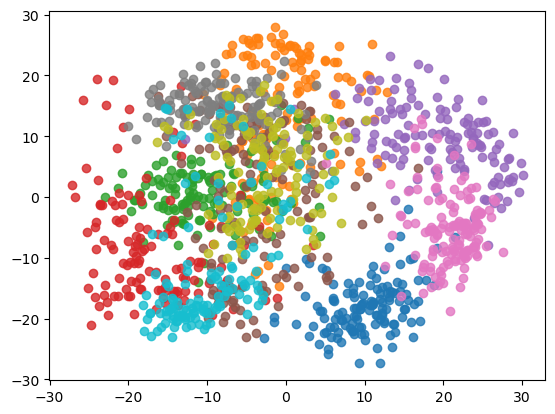

In [47]:
for i in range(10):
    plt.scatter(X_reduction[y_train==i, 0], X_reduction[y_train==i, 1], alpha=0.8)